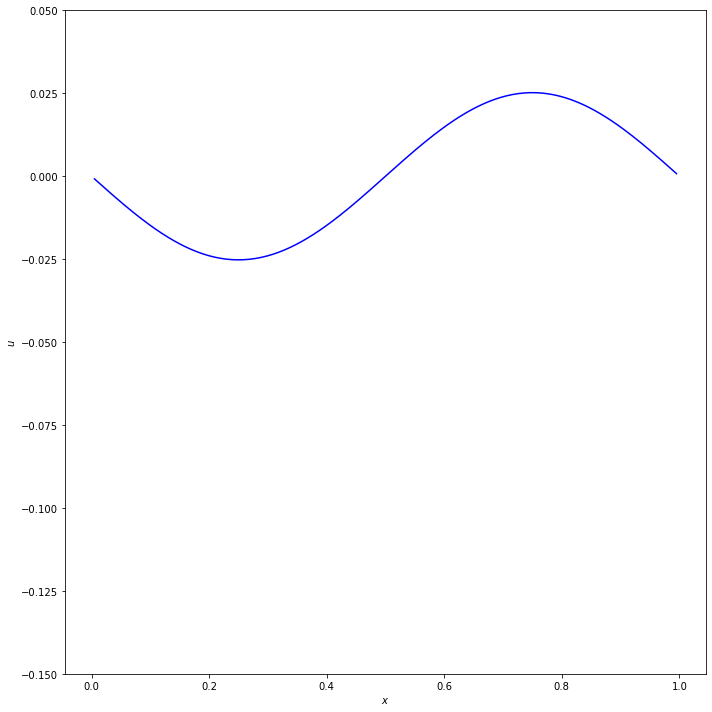

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.linalg import solve
from scipy.sparse import diags

N=200
deltax = 1/(N+1) # calculamos paso espacial
v=np.empty(N) # arreglo que contiene la densidad (o lo que sea que difunde)
xs=np.empty(N) # arreglo de posiciones
A = np.empty((N,N)) # matriz tridiagonal que usaremos para sistema lineal
#########################################################

# creamos el vector v="b"
f = N/(4*math.pi**2)
for i in range(N):
    xs[i] = (i+1)*deltax
    v[i] = f*(2*np.sin(xs[i]*math.pi*2) - np.sin((xs[i]-deltax)*math.pi*2) - np.sin((xs[i]+deltax)*math.pi*2))
# creamos la matriz A

Adiag = np.ones(N)*(-2/deltax)
Abandas = np.ones(N-1)*(1/deltax)
A = diags([Abandas, Adiag, Abandas], offsets=[1, 0, -1]).toarray()

a = solve(A, v)
    
plt.figure(figsize=(10,10))
plt.xlabel('$x$')
plt.ylabel('$u$')
plt.ylim(-.15,.05)
plt.plot(xs,a,color='blue')
plt.tight_layout()
plt.show()